<a href="https://colab.research.google.com/github/TynClause/Pornography-Detection/blob/main/prototype_Buat_Model_Deteksi_Pornografi_atau_tidak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import zipfile

import os

In [2]:
classifier_model ="https://tfhub.dev/google/imagenet/inception_v3/classification/4"

In [3]:
input_shape = (299,299)

In [4]:
feature_extractor_layer = hub.KerasLayer(
    classifier_model, input_shape=input_shape+(3,), trainable=False)

In [8]:
PATH = r'/tmp'
with zipfile.ZipFile(os.path.join(PATH,'Datasets.zip'),'r') as zipper:
  zipper.extractall('/tmp')

In [9]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip= True,
        fill_mode='nearest')

datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip= True,
        fill_mode='nearest')

In [10]:
 training_data = datagen_train.flow_from_directory('/tmp/Datasets/Training',
                                                    target_size=(299, 299),
                                                    batch_size=64)
 
 testing_data = datagen_test.flow_from_directory('/tmp/Datasets/Testing',
                                                 target_size=(299,299),
                                                 batch_size=64)

Found 262 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential()
model.add(feature_extractor_layer)
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.sigmoid))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              23853833  
_________________________________________________________________
dense (Dense)                (None, 12)                12024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 26        
Total params: 23,865,883
Trainable params: 12,050
Non-trainable params: 23,853,833
_________________________________________________________________


In [13]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['acc'])

callback = tf.keras.callbacks.EarlyStopping(
    monitor='acc',
    patience = 2,
    mode='max',
    restore_best_weights=True
)

In [14]:
history = model.fit(training_data, epochs=100,
                    validation_data=testing_data,
                    callbacks=[callback])

Epoch 1/100
5/5 [==============================] - 8s 2s/step - loss: 0.5607 - acc: 0.7710 - val_loss: 0.5245 - val_acc: 0.7561
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 0.3776 - acc: 0.8664 - val_loss: 0.3842 - val_acc: 0.8780
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 0.3170 - acc: 0.8626 - val_loss: 0.4581 - val_acc: 0.8293
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 0.2587 - acc: 0.9008 - val_loss: 0.3107 - val_acc: 0.8049
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.2566 - acc: 0.9122 - val_loss: 0.3269 - val_acc: 0.8537
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 0.2253 - acc: 0.9046 - val_loss: 0.3394 - val_acc: 0.8780
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 0.1962 - acc: 0.9237 - val_loss: 0.3496 - val_acc: 0.9024
Epoch 8/100
5/5 [==============================] - 7s 1s/step - loss: 0.2127 - acc: 0.9237 - val_loss: 0

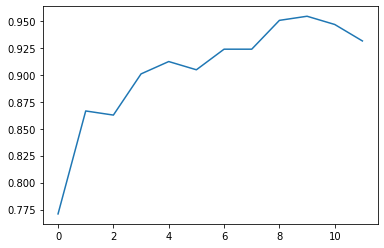

In [15]:
plt.plot(history.history['acc'])

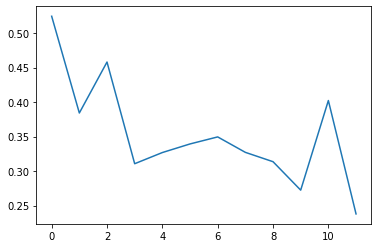

In [16]:
plt.plot(history.history['val_loss'])

In [17]:
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path)

export_path

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/saved_models/1602639082/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1602639082/assets


'/tmp/saved_models/1602639082'

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path) # path to the SavedModel directory
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [21]:
!tflite_convert \
  --saved_model_dir=/tmp/saved_models/1602639082 \
  --output_file=/tmp/model_Pornografi_detection.tflite

2020-10-14 01:33:03.569919: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-14 01:33:03.582080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-14 01:33:03.582540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-14 01:33:03.582814: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-10-14 01:33:03.584379: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-10-14 01:33:03.590984: I tensorflow/stream_executor/plat

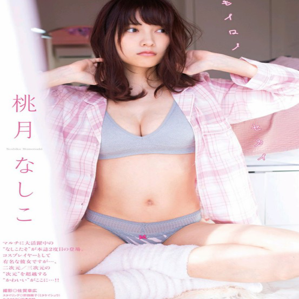

In [22]:
contoh = Image.open("/tmp/Datasets/Testing/Pornography/data-4.jpg").resize(input_shape)
contoh


In [24]:
contoh = np.array(contoh)/255.0

In [25]:
result = model.predict(contoh[np.newaxis, ...])
result.shape

(1, 2)

In [26]:
result

array([[0.00590718, 0.99768555]], dtype=float32)

In [27]:
np.argmax(result[0], axis=-1)

1

In [32]:
def prediksi_gambar(image):
  picture = Image.open(image).resize(input_shape)
  picture = np.array(picture)/255.0
  result = model.predict(picture[np.newaxis, ...])
  hasil = np.argmax(result[0], axis=-1)
  plt.imshow(picture)
  if hasil == 0:
        title = 'Bukan Pornografi'
  elif hasil == 1:
        title = 'Pornografi'
  plt.title(title,fontweight='bold')
    

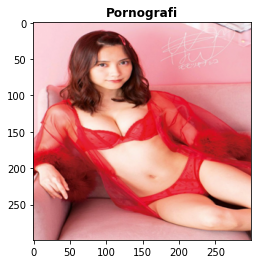

In [35]:
prediksi_gambar('/tmp/Datasets/Testing/Pornography/data-2.jpg')

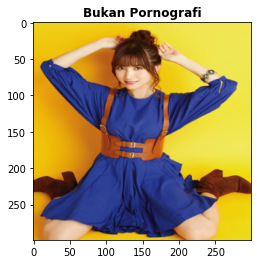

In [36]:
prediksi_gambar('/tmp/Datasets/Testing/Non-Pornography/data-2.jpg')

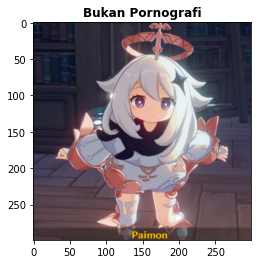

In [37]:
prediksi_gambar('/tmp/paimon.png')